# Proyecto 4: Expresiones regulares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import shutil

## Leer y guardar todos los archivos

Primero descomprimiremos el archivo zip que tiene los archivos csv

Utilizando la libreia shutil

shutil.unpack_archive('socialnetworks.zip', 'socialnetworks')

Lo que hicimos fue descomprimir el archivo con el nombre de socialnetworks y posteriormente analizar que archivos cumplen con el patron para identificar aquellos que tengan en el nombre un mes, y aquellos que no

In [3]:
ruta_zip = 'socialnetworks.zip'
ruta_destino = '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2'
shutil.unpack_archive(ruta_zip,ruta_destino)
patron = r'2022'
archivos_econtrados_mes = []
archivos_econtrados_sin_mes = []

Ahora lo que haremos, sera recorrer los archivos que descomprimimos y buscamos los que tengan el año 2022

In [4]:
# Recorreremos cada carpeta

for carpeta, subcarpetas, archivos in os.walk(ruta_destino):
    for archivo in archivos:
        ruta_completa = os.path.join(carpeta, archivo)
        
        if archivo.endswith('.csv'):
            # Verificar si el archivo tiene una fecha en su nombre
            fecha_encontrada = re.search(patron, archivo)
            
            if fecha_encontrada:
                archivos_econtrados_mes.append(ruta_completa)
            else:
                archivos_econtrados_sin_mes.append(ruta_completa)

In [5]:
len(archivos_econtrados_mes)

12

In [6]:
len(archivos_econtrados_sin_mes)
archivos_econtrados_sin_mes

['/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - youtube.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - tiktok.csv']

Ya que tenemos los archivos separados en un arreglo, los podemos abrir en los dataframes que nos piden

In [7]:
Instagram = []
Patron_Insta = r'INSTAGRAM|instagram|Instagram'

Tik_tok = []
Patron_Tik_tok = r'TIKTOK|tiktok|Tiktok'

Youtube = []
Patron_Youtube = r'Youtube|youtube|YOUTUBE'

In [8]:
# Haremos una función que encuentre los patrones que le pasemos en un arreglo
# Y los guarde en cierto arreglo, para que sea más fácil hacer los dataframes

def patrones(arreglo, patron, arreglo_para_guardar):
    for i in arreglo:
        r = re.search(patron, i)
        if r:
            arreglo_para_guardar.append(i)

In [9]:
patrones(archivos_econtrados_mes, Patron_Insta, Instagram)
patrones(archivos_econtrados_mes, Patron_Tik_tok, Tik_tok)
patrones(archivos_econtrados_mes, Patron_Youtube, Youtube)

## Archivos sin mes (Resumen de cada red social)

Ya que tenemos todos los archivos de las redes sociales por separado, abriremos los dataframes que no tienen fecha

In [9]:
df_Insta_s_f = pd.read_csv(archivos_econtrados_sin_mes[0])
df_Tik_tok_s_f = pd.read_csv(archivos_econtrados_sin_mes[2])
df_Youtube_s_f = pd.read_csv(archivos_econtrados_sin_mes[1])

In [10]:
df_Insta_s_f.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [11]:
df_Tik_tok_s_f.head()

,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K


In [12]:
df_Youtube_s_f.head()

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K


## Archivos con mes

Ahora, como se solicita que los archivos cuyo nombre tenga un mes, tambien tengan una columna que lo indique, se le agregará a cada uno

### Instagram

In [13]:
Instagram

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-instagram - -nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-instagram june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-INSTAGRAM - -DEC 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - instagram sep-2022.csv']

In [14]:
# Archivo de Instagram - noviembre
df_I_Nov = pd.read_csv(Instagram[0])
df_I_Nov['Month'] = 'November'
df_I_Nov.head(2)

,s.no,Name,Instagram Name,Category-1,Followers,\nCountry,Eng. (Auth.),Eng. (Avg.),Category-2,Month
0,1,cristiano,Cristiano Ronaldo,Sports with a ball,483.1M,India,4.5M,5.6M,NaN,November
1,2,kyliejenner,Kylie 🤍,Fashion,370M,United States,2.8M,4.4M,Modeling,November


In [15]:
# Archivo de Instagram - junio
df_I_June = pd.read_csv(Instagram[1])
df_I_June['Month'] = 'June'
df_I_June.head(2)

,instagram name,influencer name,Category_1,Category_2,Subscribers count,Views avg.,Likes avg,Comments avg.,Month
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June


In [16]:
# Archivo de Instagram - diciembre
df_I_Dec = pd.read_csv(Instagram[2])
df_I_Dec['Month'] = 'December'
df_I_Dec.head(2)

,Rank,name,instagram name,Category_1,Category_2,followers,country,Eng. (Auth.),Eng. (Avg.),Month
0,1,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,2,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December


In [17]:
# Archivo de Instagram - septiembre
df_I_Sep = pd.read_csv(Instagram[3])
df_I_Sep['Month'] = 'September'
df_I_Sep.head(2)

,S.no,Instagram name,Name,Subscribers,Audience country,Authentic engagement\n,Engagement average\r\n,Category_1,Category_2,Month
0,1,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN,September
1,2,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,September


Una vez que cada DataFrame contiene los meses, se concatenan en uno solo y se limpia

In [18]:
# Concatenar los DataFrames de Instagram en un solo DataFrame
df_Insta = pd.concat([df_I_June, df_I_Sep, df_I_Nov, df_I_Dec], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Insta.head()

,instagram name,influencer name,Category_1,Category_2,Subscribers count,Views avg.,Likes avg,Comments avg.,Month,S.no,...,Category-1,Followers,\nCountry,Eng. (Auth.),Eng. (Avg.),Category-2,Rank,name,followers,country
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,__youngbae__,TAEYANG,Music,NaN,13.4M,Indonesia,269.6K,304.1K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.6M,Russia,164.4K,189.4K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,_hakkencoser_,Hakken 八犬,Lifestyle,Photography,3.5M,United States,525.1K,643K,June,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Limpieza del DataFrame de Instagram
    # Combinar las columnas que se refieren a la misma información y eliminar las que ya no se necesitan
#Username
df_Insta['Username'] = df_Insta['Instagram Name'].combine_first(df_Insta['instagram name']).combine_first(df_Insta['Instagram name'])
df_Insta = df_Insta.drop(['Instagram Name','instagram name','Instagram name'], axis=1)
#Name
df_Insta['Name'] = df_Insta['Name'].combine_first(df_Insta['influencer name ']).combine_first(df_Insta['name']).combine_first(df_Insta[' Name'])
df_Insta = df_Insta.drop(['influencer name ','name',' Name'], axis=1)
#Subscribers o Followers
df_Insta['Subscribers o Followers'] = df_Insta['Subscribers'].combine_first(df_Insta['Subscribers count']).combine_first(df_Insta['followers']).combine_first(df_Insta['Followers'])
df_Insta = df_Insta.drop(['Subscribers','Subscribers count','followers','Followers'], axis=1)
#Country
df_Insta['Country'] = df_Insta['Audience country'].combine_first(df_Insta['Views avg.']).combine_first(df_Insta['country']).combine_first(df_Insta['\nCountry'])
df_Insta = df_Insta.drop(['Audience country','Views avg.','country','\nCountry'], axis=1)
#Authentic
df_Insta['Authentic'] = df_Insta['Authentic engagement\n'].combine_first(df_Insta['Eng. (Auth.)']).combine_first(df_Insta['Likes avg'])
df_Insta = df_Insta.drop(['Authentic engagement\n','Eng. (Auth.)','Likes avg'], axis=1)
#Engagement
df_Insta['Engagement'] = df_Insta['Engagement average\r\n'].combine_first(df_Insta['Eng. (Avg.)']).combine_first(df_Insta['Comments avg.'])
df_Insta = df_Insta.drop(['Engagement average\r\n','Eng. (Avg.)','Comments avg.'], axis=1)
#Category1
df_Insta['Category1'] = df_Insta['Category-1'].combine_first(df_Insta['Category_1'])
df_Insta = df_Insta.drop(['Category-1','Category_1'], axis=1)
#Category2
df_Insta['Category2'] = df_Insta['Category-2'].combine_first(df_Insta['Category_2'])
df_Insta = df_Insta.drop(['Category-2','Category_2'], axis=1)
#Borrar datos inecesarios
df_Insta = df_Insta.drop(['s.no','S.no','Rank'], axis=1)

In [20]:
# Verificar el DataFrame de Instagram resultante
df_Insta

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
0,June,433,433,50.7M,Spain,274.9K,456.7K,Sports with a ball,NaN
1,June,김우빈,____kimwoobin,3.6M,Indonesia,449.4K,592.7K,Lifestyle,NaN
2,June,TAEYANG,__youngbae__,13.4M,Indonesia,269.6K,304.1K,Music,NaN
3,June,НАСТЯ ИВЛЕЕВА,_agentgirl_,18.6M,Russia,164.4K,189.4K,Shows,NaN
4,June,Hakken 八犬,_hakkencoser_,3.5M,United States,525.1K,643K,Lifestyle,Photography
...,...,...,...,...,...,...,...,...,...
4067,December,thiago6,Thiago Alcantara,10.4M,United Kingdom,129.9K,222.7K,Sports with a ball,NaN
4068,December,soycintiacossio,Cintia Cossio,6M,Colombia,313.4K,390.6K,Modeling,Adult content
4069,December,feat.dino,이찬,2.7M,South Korea,716.6K,876.4K,Lifestyle,NaN
4070,December,djokernole,Novak Djokovic,11.8M,United States,158.6K,197.5K,Sports with a ball,NaN


In [21]:
df_Insta.isna().sum()

Month                         0
Name                         47
Username                     41
Subscribers o Followers       0
Country                       9
Authentic                     0
Engagement                   16
Category1                   441
Category2                  2852
dtype: int64

In [22]:
df_Insta = df_Insta.drop_duplicates()

In [23]:
df_Insta=df_Insta.dropna()

In [24]:
df_Insta.shape

(1168, 9)

Se realizan los mismos pasos anteriores para los otros dos DataFrames de TikTok y Youtube

### TikTok

In [25]:
Tik_tok

['/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-tiktok - ---nov 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - Tiktok sep 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-tiktok june 2022 - june 2022.csv',
 '/home/moni/Ciencia de datos/Proyectos/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-TIKTOK - ---DEC 2022.csv']

In [26]:
#ARCHIVO DE NOVIEMBRE
df_T_Nov = pd.read_csv(Tik_tok[0])
df_T_Nov['Month'] = 'November'
df_T_Nov.drop(['row-cell'], axis=1, inplace=True)
df_T_Nov.head(2)

,Tiktoker name,Tiktok name,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November
1,yossikramer,Yossi,145.6K,26.8M,2.2M,30.1K,71.2K,November


In [27]:
# ARCHIVO DE SEPTIEMBRE
df_T_Sep = pd.read_csv(Tik_tok[1])
df_T_Sep['Month'] = 'September'
df_T_Sep.drop(['S.no'], axis=1, inplace=True)
df_T_Sep.head(2)

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September


In [28]:
# ARCHIVO DE JUNIO
df_T_June = pd.read_csv(Tik_tok[2])
df_T_June['Month'] = 'June'
df_T_June.head(2)

,Tiktoker,influencer name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June
1,_.anime.edits_0,video,97K,1.7M,75.6K,1.5K,8.7K,June


In [29]:
# ARCHIVO DE DICIEMBRE 
df_T_Dic = pd.read_csv(Tik_tok[3])
df_T_Dic['Month'] = 'December'
df_T_Dic.drop(['Rank'], axis=1, inplace=True)
df_T_Dic.head(2)

,Tiktoker name,Tiktok name,followers,views(avg),likes(avg.),comments(avg.),shares(avg.),Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December


In [30]:
# Concatenar los DataFrames de TikTok en un solo DataFrame
df_Tik_tok = pd.concat([df_T_Sep, df_T_Dic, df_T_Nov, df_T_June], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Tik_tok.head()

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.,Month,followers,views(avg),...,\nFollowers,Views (Avg.),Likes (Avg.),Comments (Avg.),Shares (Avg.),Tiktoker,influencer name,Subscribers count,Likes avg,Shares avg
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K,September,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Limpieza del DataFrame de Tiktok

#Username
df_Tik_tok['Username']=df_Tik_tok['Tiktoker name'].combine_first(df_Tik_tok['Tiktoker'])
df_Tik_tok.drop(['Tiktoker name', 'Tiktoker'], axis=1, inplace=True)

In [32]:
#Name
df_Tik_tok['Name']=df_Tik_tok['Tiktok name']
df_Tik_tok.drop(['Tiktok name'], axis=1, inplace=True)

In [33]:
df_Tik_tok['Name'] = df_Tik_tok['Name'].combine_first(df_Tik_tok['influencer name'])
df_Tik_tok.drop(['influencer name'], axis=1, inplace=True)

In [34]:
#Folowers o Suscribers
df_Tik_tok['Followers o Suscribers'] = df_Tik_tok['Subscribers'].combine_first(df_Tik_tok['followers']).combine_first(df_Tik_tok['\nFollowers']).combine_first(df_Tik_tok['Subscribers count'])
df_Tik_tok.drop(['Subscribers', 'followers', '\nFollowers', 'Subscribers count'],axis=1, inplace=True)

In [35]:
#Likes
df_Tik_tok['Likes'] = df_Tik_tok['Likes (Avg.)'].combine_first(df_Tik_tok['Likes avg']).combine_first(df_Tik_tok['Likes avg.']).combine_first(df_Tik_tok['likes(avg.)'])
df_Tik_tok.drop(['Likes (Avg.)', 'Likes avg', 'Likes avg.', 'likes(avg.)'],axis=1,inplace=True)

In [36]:
#Views
df_Tik_tok['Views'] = df_Tik_tok['Views (Avg.)'].combine_first(df_Tik_tok['Views avg.']).combine_first(df_Tik_tok['views(avg)'])
df_Tik_tok.drop(['Views (Avg.)', 'Views avg.', 'views(avg)'], axis=1, inplace=True)

In [37]:
#Shares
df_Tik_tok['Shares'] = df_Tik_tok['Shares (Avg.)'].combine_first(df_Tik_tok['Shares avg']).combine_first(df_Tik_tok['Shares avg.']).combine_first(df_Tik_tok['shares(avg.)'])
df_Tik_tok.drop(['Shares (Avg.)', 'Shares avg', 'Shares avg.', 'shares(avg.)'], axis=1, inplace=True)

In [38]:
#Comments
df_Tik_tok['Comments'] = df_Tik_tok['Comments (Avg.)'].combine_first(df_Tik_tok['Comments avg.']).combine_first(df_Tik_tok['comments(avg.)'])
df_Tik_tok.drop(['Comments (Avg.)', 'Comments avg.', 'comments(avg.)'], axis=1, inplace=True)

In [39]:
# # Verificar el DataFrame de TikTok resultante
df_Tik_tok.head()

,Month,Username,Name,Followers o Suscribers,Likes,Views,Shares,Comments
0,September,jypestraykids,Stray Kids,13.8M,2.3M,6.4M,34.2K,50.2K
1,September,khaby.lame,Khabane lame,149.2M,2.3M,17.3M,8.7K,15.2K
2,September,scarlettsspam2,scarlett,2.1M,845.8K,17.9M,6.3K,53.9K
3,September,addisonre,Addison Rae,88.7M,906.6K,22M,26.2K,7.6K
4,September,belindatok,Belinda,4.8M,1.5M,14.2M,15.3K,14.5K


In [40]:
df_Tik_tok.isna().sum()

Month                     0
Username                  1
Name                      4
Followers o Suscribers    1
Likes                     1
Views                     1
Shares                    1
Comments                  1
dtype: int64

In [41]:
df_Tik_tok.drop_duplicates()

,Month,Username,Name,Followers o Suscribers,Likes,Views,Shares,Comments
0,September,jypestraykids,Stray Kids,13.8M,2.3M,6.4M,34.2K,50.2K
1,September,khaby.lame,Khabane lame,149.2M,2.3M,17.3M,8.7K,15.2K
2,September,scarlettsspam2,scarlett,2.1M,845.8K,17.9M,6.3K,53.9K
3,September,addisonre,Addison Rae,88.7M,906.6K,22M,26.2K,7.6K
4,September,belindatok,Belinda,4.8M,1.5M,14.2M,15.3K,14.5K
...,...,...,...,...,...,...,...,...
4003,June,zeth,Zeth,12.5M,1.3M,6.7M,7.7K,3K
4004,June,zodiac.boyfriend,Zodiac Boyfriend🪐🔮,1.8M,272.7K,1.9M,3.6K,6.8K
4005,June,zowloficial,Lord Zowl,1.1M,178.1K,1.4M,2.1K,1.4K
4006,June,zrt.foot,ZR7,100.8K,218K,2.3M,6.4K,1.7K


In [42]:
df_Tik_tok=df_Tik_tok.dropna()

In [43]:
df_Tik_tok = df_Tik_tok.drop_duplicates()

In [44]:
df_Tik_tok.shape

(3972, 8)

### Youtube

In [11]:
Youtube

['/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-youtube june 2022 - june 2022.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-youtube - --nov 2022.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers-YOUTUBE - --DEC 2022.csv',
 '/home/melinkova/PCD/Parcial_2/CienciaDatosLasChicasSuperpoderosas/Proyectos/Unidad2/socialnetworks/social media influencers - Youtube sep-2022.csv']

In [12]:
# Archivo de Youtube - diciembre
df_Y_Dec = pd.read_csv(Youtube[0])
df_Y_Dec['Month'] = 'December'
df_Y_Dec.head(2)

,channel name,youTuber,Category,Category_2,Subscribers count,Country,Views avg.,Likes avg,Comments avg.,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',December
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',December


In [13]:
# Archivo de Youtube - noviembre
df_Y_Nov = pd.read_csv(Youtube[1])
df_Y_Nov['Month'] = 'November'
df_Y_Nov.head(2)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November
1,2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,November


In [14]:
# Archivo de Youtube - septiembre
df_Y_Sep = pd.read_csv(Youtube[2])
df_Y_Sep['Month'] = 'September'
df_Y_Sep.head(2)

,s.no,Youtube channel,youtuber name,Category,Followers,Country,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,Month
0,1,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,September
1,2,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,September


In [15]:
# Archivo de Youtube - junio
df_Y_June = pd.read_csv(Youtube[3])
df_Y_June['Month'] = 'June'
df_Y_June.head(2)

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,Month
0,1,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,June
1,2,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,June


In [16]:
# Concatenar los DataFrames de Youtube en un solo DataFrame
df_Youtube = pd.concat([df_Y_June, df_Y_Sep, df_Y_Nov, df_Y_Dec], axis=0, ignore_index=True)

# Verificar el DataFrame resultante
df_Youtube.head()

,S.no,Name,Youtuber,Country,Subscribers,Category_2,Avg. views\r\n,Avg. likes,Avg Comments,Category_3,...,\nViews (Avg.),Likes (Avg.),Comments (Avg.),Category-2,channel name,youTuber,Subscribers count,Views avg.,Likes avg,Comments avg.
0,1.0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Limpieza de YouTube

# Username
df_Youtube['Username'] = df_Youtube['Youtuber'].combine_first(df_Youtube['channel name']).combine_first(df_Youtube['Youtube channel'])

In [18]:
df_Youtube.drop(['Youtuber', 'channel name','Youtube channel'],axis=1,inplace=True)

In [19]:
# Name
df_Youtube['Name'] = df_Youtube['Name'].combine_first(df_Youtube['youTuber']).combine_first(df_Youtube['youtuber name'])

In [20]:
df_Youtube.drop(['youTuber','youtuber name'],axis=1,inplace=True)

In [21]:
# Subscribers
df_Youtube['Subscribers'] = df_Youtube[' Subscribers'].combine_first(df_Youtube['Followers']).combine_first(df_Youtube['Subscribers count'])

In [22]:
df_Youtube.drop([' Subscribers', 'Followers', 'Subscribers count'],axis=1,inplace=True)

In [23]:
# Views
df_Youtube['Views'] = df_Youtube['Avg. views\r\n'].combine_first(df_Youtube['\nViews (Avg.)']).combine_first(df_Youtube['Views avg.'])

In [24]:
df_Youtube.drop(['Avg. views\r\n', '\nViews (Avg.)', 'Views avg.'],axis=1,inplace=True)

In [25]:
# Likes
df_Youtube['Likes'] = df_Youtube['Avg. likes'].combine_first(df_Youtube['Likes (Avg.)']).combine_first(df_Youtube['Likes avg'])

In [26]:
df_Youtube.drop(['Avg. likes', 'Likes (Avg.)', 'Likes avg'],axis=1,inplace=True)

In [27]:
# Comments
df_Youtube['Comments'] = df_Youtube['Avg Comments'].combine_first(df_Youtube['Comments (Avg.)']).combine_first(df_Youtube['Comments avg.'])

In [28]:
df_Youtube.drop(['Avg Comments', 'Comments (Avg.)', 'Comments avg.'],axis=1,inplace=True)

In [29]:
# Category1
df_Youtube['Category1'] = df_Youtube['Category'].combine_first(df_Youtube['Category_3'])

In [30]:
df_Youtube.drop(['Category', 'Category_3'],axis=1,inplace=True)

In [31]:
# Category2
df_Youtube['Category2'] = df_Youtube['Category_2'].combine_first(df_Youtube['Category-2'])

In [32]:
df_Youtube.drop(['Category_2', 'Category-2'],axis=1,inplace=True)

In [33]:
# Eliminacion de columnas que no queremos
df_Youtube.drop(['s.no', 'S.no'],axis=1,inplace=True)

In [34]:
df_Youtube

,Name,Country,Month,Username,Subscribers,Views,Likes,Comments,Category1,Category2
0,T-Series,India,June,tseries,224.4M,141.5K,4.6K,125,NaN,Music & Dance
1,Cocomelon - Nursery Rhymes,NaN,June,checkgate,142.5M,12.5M,64.8K,0,NaN,Education
2,PewDiePie,United States,June,PewDiePie,111.6M,1.9M,130.5K,7.4K,NaN,Animation
3,MrBeast,United States,June,MrBeast6000,104.1M,44.8M,2.2M,70.9K,Humor,Video games
4,✿ Kids Diana Show,NaN,June,✿ Kids Diana Show,100.5M,6.9M,34.8K,0,Toys,Animation
...,...,...,...,...,...,...,...,...,...,...
4066,Power Vision,United States,December,Power Vision,9.5M,137.3K,1.3K,39,NaN,NaN
4067,POPS MUSIC,United States,December,POPSVIETNAM,9.5M,4.6K,144,5,Music & Dance,NaN
4068,Niki and Gabi,United States,December,Niki and Gabi,9.5M,387.6K,17.8K,516,Fashion,Humor
4069,Corridor,United States,December,Corridor,9.5M,1.9M,141.6K,4.7K,Animation,NaN


In [53]:
df_Youtube.isna().sum()

Name           0
Country        0
Month          0
Username       0
Subscribers    0
Views          0
Likes          0
Comments       0
Category1      0
Category2      0
dtype: int64

In [54]:
# Seguimos con la limpieza...
df_Youtube=df_Youtube.dropna()

In [55]:
df_Youtube = df_Youtube.drop_duplicates()

In [56]:
df_Youtube.shape

(858, 10)

## Obtención de datos de Instagram

#### - Número total de cuentas (Username) distintas, se sabe que el DataFrame tiene 1168 registros

In [73]:
#Muestra las cuentas duplicadas
df_Insta[df_Insta.Username.duplicated(keep=False)]

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
4,June,Hakken 八犬,_hakkencoser_,3.5M,United States,525.1K,643K,Lifestyle,Photography
10,June,설인아 sᴇᴏʀɪɴᴀ,_seorina,5.7M,South Korea,728K,903.5K,Lifestyle,Cinema & Actors/actresses
20,June,AB de Villiers,abdevilliers17,18.3M,India,274.1K,315.8K,Sports with a ball,Lifestyle
33,June,Ahmed Abouhashima,ahmedabohashima,14.8M,Egypt,121.9K,164.4K,Business & Careers,Finance & Economics
49,June,Álvaro Morata,alvaromorata,17.2M,Italy,104.7K,162.1K,Sports with a ball,Literature & Journalism
...,...,...,...,...,...,...,...,...,...
4044,December,neeraj____chopra,Neeraj Chopra,6.3M,India,294.7K,386.3K,Shows,Winter sports
4049,December,officialslystallone,Sly Stallone,15.6M,United States,121.4K,153.4K,Art/Artists,Cinema & Actors/actresses
4060,December,nickjonas,Nick Jonas,33.5M,United States,49.3K,70.1K,Music,Art/Artists
4066,December,earthpix,🌎 EarthPix 🌎,23.3M,United States,77.3K,100.2K,Nature & landscapes,Photography


In [74]:
#Muestra el número total de cuentas distintas
df_Insta.Username.nunique()

775

#### - Promedio de seguidores, authentic, engagement, de cada cuenta

In [75]:
# Se transforman los registros de las columnas solicitadas a valores numericos
df_Insta['Subscribers o Followers'] = df_Insta['Subscribers o Followers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Insta['Authentic'] = df_Insta['Authentic'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Insta['Engagement'] = df_Insta['Engagement'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)

In [76]:
df_Insta

,Month,Name,Username,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2
4,June,Hakken 八犬,_hakkencoser_,3500000,United States,525100,643000,Lifestyle,Photography
10,June,설인아 sᴇᴏʀɪɴᴀ,_seorina,5700000,South Korea,728000,903500,Lifestyle,Cinema & Actors/actresses
11,June,SHOTARO ショウタロウ,_shotaroo_,5300000,Indonesia,866900,1100000,Lifestyle,Music
20,June,AB de Villiers,abdevilliers17,18300000,India,274100,315800,Sports with a ball,Lifestyle
33,June,Ahmed Abouhashima,ahmedabohashima,14800000,Egypt,121900,164400,Business & Careers,Finance & Economics
...,...,...,...,...,...,...,...,...,...
4064,December,labels.hybe,HYBE LABELS Updates,2300000,India,891100,1000000,Shows,Music
4065,December,torylanez,FARGO’S CRAZY LIFE,11900000,United States,85100,196000,Shows,Music
4066,December,earthpix,🌎 EarthPix 🌎,23300000,United States,77300,100200,Nature & landscapes,Photography
4068,December,soycintiacossio,Cintia Cossio,6000000,Colombia,313400,390600,Modeling,Adult content


In [111]:
#Obtiene el promedio de las columnas solicitadas por cada cuenta
columnas = ['Subscribers o Followers','Authentic','Engagement']
Promedios = df_Insta.groupby(['Username', 'Month'])[columnas].mean()
Promedios.head(10)

Subscribers o Followers  Authentic  Engagement
Username       Month                                                    
! Julian       December                 6500000.0   514600.0    646000.0
               November                 6400000.0   294600.0    362900.0
12 🥷🏽🖤         December                 8300000.0   211700.0    342000.0
               November                 7700000.0   286600.0    463100.0
2000           December                 6700000.0   440900.0    535300.0
               November                 6400000.0   399900.0    537800.0
39saku_chan    September                4300000.0   708000.0    873100.0
AB de Villiers December                19900000.0   389500.0    449200.0
               November                19000000.0   360800.0    416300.0
ABU SAALIM     November                 3000000.0   372600.0    881400.0

#### - Metricas de Valor de cada cuenta

In [119]:
metricaIG = []
for c in range(len(Promedios)):
    metricaIG.append(Promedios.Engagement/Promedios['Subscribers o Followers'])
metricaIG[0]

Username        Month   
! Julian        December    0.099385
                November    0.056703
12 🥷🏽🖤          December    0.041205
                November    0.060143
2000            December    0.079896
                              ...   
𝑨𝒋𝒆𝒚 𝑵𝒂𝒈𝒂𝒓      November    0.060671
🌎  EarthPix  🌎  December    0.004300
                November    0.010223
📲               December    0.218182
                November    0.234043
Length: 1166, dtype: float64

#### - Histograma el numero de cuentas que inicien por cada letra del alfabeto y en una sola categoria todos los que no comiencen con una letra del alfabeto.

In [78]:
# Primero buscaremos el patron que tenga que inice con las letras del alfabeto 
patron_Alfabeto = r'^[a-zA-Z]'

Alfabeto = []
S_Alfabeto = []

for username in df_Insta['Username']:
    if re.search(patron_Alfabeto, username):
        Alfabeto.append(username)
    else:
        S_Alfabeto.append(username)

In [79]:
#Se obtienen los tamaños de cada lista de cuentas
Datos = [len(Alfabeto), len(S_Alfabeto)]
Datos

[1115, 53]

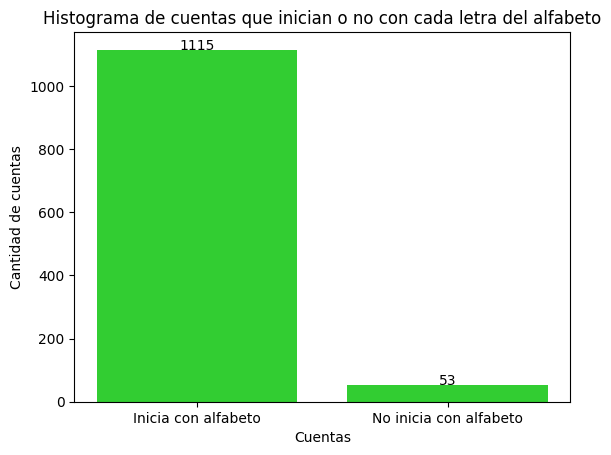

In [80]:
Etiquetas = ['Inicia con alfabeto', 'No inicia con alfabeto']

plt.bar(Etiquetas, Datos, color='limegreen')
plt.title('Histograma de cuentas que inician o no con cada letra del alfabeto')
plt.xlabel('Cuentas')
plt.ylabel('Cantidad de cuentas')

# Mostramos el número exacto de cuentas en el histograma
for i, count in enumerate(Datos):
    plt.text(i, count + 1, str(count), ha='center')

plt.show() #Mostramos el histograma

#### - ¿Cual es la cuenta de IG con mas caracteres en su nombre?

In [81]:
#Se obtienen los nombres en una lista
Nombres = df_Insta['Name'].tolist()
TamNombres = []

# Se obtiene la longitud del nombre con más caracteres
for n in Nombres:
    TamNombres.append(len(n))
MasCaracteres = max(TamNombres)
MasCaracteres

30

In [82]:
#Se obtienen los nombres de las cuentas con más caracteres en su nombre (el máx es 30)
Cuent = []
for n in range(len(TamNombres)):
    if TamNombres[n] == MasCaracteres:
        Cuent.append(Nombres[n])
Cuent

['William  Levy / Actor Producer',
 '𝐑𝐨𝐡𝐢𝐭 𝐙𝐢𝐧𝐣𝐮𝐫𝐤𝐞 ~ 𝐫𝐞𝐚𝐜𝐭𝐢𝐨𝐧𝐛𝐨𝐢 💫',
 'William  Levy / Actor Producer',
 'Shahin Samad poor شاهین صمدپور']

In [83]:
#Se obtienen las cuentas (username) que son las que tienen mas caracteres en su nombre
Cuentas = []
for i in range(len(Cuent)):
    Cuentas.append((df_Insta.Username[df_Insta['Name']==Cuent[i]]).tolist())
Cuentas

[['willevy', 'willevy'],
 ['rohittt_09_'],
 ['willevy', 'willevy'],
 ['shahinsamadpoor']]

En este caso se observa que son 3 cuentas las que tienen más caracteres en su nombre (30)

#### - ¿Cuantas cuentas de Instagram tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?
Las iniciales de mi equipo son L, E y M (Luis, Esmeralda y Mónica)

In [84]:
# Patrón que contenga las iniciales de los integrantes del equipo 
patron = r'[lem]'
iniciales = re.compile(patron, re.IGNORECASE)
# Filtrar los registros que contengan las letras en las columnas 'Username' o 'Name'
cuentasIG = df_Insta[(df_Insta['Username'].str.contains(iniciales, na=False)) | (df_Insta['Name'].str.contains(iniciales, na=False))]
# Obtener la cantidad de registros que cumplen la condición
cuentasIG.shape[0]

1035

Por lo tanto se observa que 1035 cuentas contienen las iniciales de los integrantes del equipo.

#### - Métrica que identifique las 10 cuentas más importantes de Instagram

En este caso la métrica planteada para encontrar las 10 cuentas más importantes de Instagram es con base en la cantidad de Subscriptores y Engagement, debido a que este es un indicador que sirve para medir la capacidad de interacción entre una cuenta y sus diferentes canales de comunicación y los seguidores de la misma, por lo tanto, aquellas cuentas que tengan una mayor cantidad de engagement, al mismo tiempo que tiene una gran cantidad de subscriptores, indicaría que son las de mayor importancia.

In [133]:
# Obtenemos los registros de diciembre para la métrica y los ordenamos ascentemente para obtener las cuentas
# más importantes, al menos por la métrica planteada que fue el conteo de subscribers y engagement.
cuentasImportInsta = df_Insta[df_Insta['Month'] == 'December'].sort_values(by='Subscribers o Followers', ascending=False)
cuentasImportInstaFinal = cuentasImportInsta[cuentasImportInsta['Month'] == 'December'].sort_values(by='Engagement', ascending=False)
# Obtenemos el top 10 de cuentas con mayor número de seguidores en diciembre, se eligió filtrar por diciembre
# ya que es el mes de cierre y los usuarios que hayan tenido más subscriptores se consideran los más importantes
# para Instagram
top10 = cuentasImportInstaFinal.head(10)
# Se muestra el username y cuantos subscribers tiene esa cuenta.
print(top10[['Username', 'Subscribers o Followers', 'Engagement']])

               Username  Subscribers o Followers  Engagement
3072          Leo Messi                409800000    23400000
3096              jhope                 42400000     5900000
3076            Kendall                268000000     5000000
3113       Jenna Ortega                 23800000     4900000
3102                 RM                 40400000     4600000
3116  Antonela Roccuzzo                 23700000     4600000
3075            Kylie 🤍                376300000     4300000
3098             JISOO🤍                 66700000     3800000
3114                차은우                 31600000     3600000
3119     Olivia Rodrigo                 28900000     3500000


#### - Histograma del numero de seguidores promedio por pais

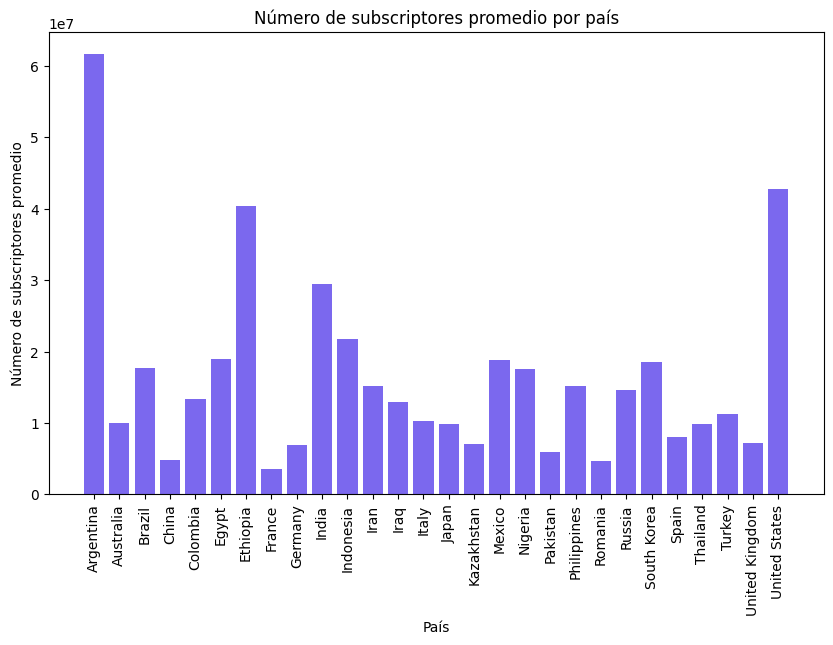

In [86]:
# Obtener los países únicos
paises = df_Insta['Country'].unique()

# Calcular el número de seguidores promedio por país
promedio_seguidores = df_Insta.groupby('Country')['Subscribers o Followers'].mean()

plt.figure(figsize=(10, 6))
plt.bar(promedio_seguidores.index, promedio_seguidores.values, color='mediumslateblue')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Número de subscriptores promedio')
plt.title('Número de subscriptores promedio por país')
plt.show()

#### - Serie con todas las categorias existentes en todos los archivos de Instagram

In [123]:
# Obtener las categorías únicas (todas)
df_Insta['Category'] = df_Insta['Category1'].combine_first(df_Insta['Category2'])
TodasCat = (df_Insta['Category'].unique()).tolist()
TodasCat

['Lifestyle',
 'Sports with a ball',
 'Business & Careers',
 'Music',
 'Fashion',
 'Cinema & Actors/actresses',
 'Shows',
 'Modeling',
 'Beauty',
 'Finance & Economics',
 'Photography',
 'Family',
 'Art/Artists',
 'Cars & Motorbikes',
 'Computers & Gadgets',
 'Humor & Fun & Happiness',
 'Literature & Journalism',
 'Nature & landscapes',
 'Extreme Sports & Outdoor activity',
 'Education',
 'Management & Marketing',
 'Clothing & Outfits',
 'Luxury',
 'Fitness & Gym',
 'Science',
 'Machinery & Technologies',
 'Winter sports',
 'Racing Sports',
 'Crypto',
 'Gaming',
 'Water sports',
 'Travel']

#### - Serie con todos los paises que encuentre en los archivos

In [104]:
# Obtener los países únicos (todos)
TodosPaises= [] 
TodosPaises = (df_Insta['Country'].unique()).tolist()
TodosPaises

['United States',
 'South Korea',
 'Indonesia',
 'India',
 'Egypt',
 'Brazil',
 'Italy',
 'Mexico',
 'Colombia',
 'Argentina',
 'Philippines',
 'Germany',
 'Russia',
 'Turkey',
 'Iran',
 'Spain',
 'Thailand',
 'Iraq',
 'United Kingdom',
 'Japan',
 'Pakistan',
 'Romania',
 'France',
 'Nigeria',
 'Kazakhstan',
 'Ethiopia',
 'Australia',
 'China']

#### - Histograma el numero de seguidores por categoria

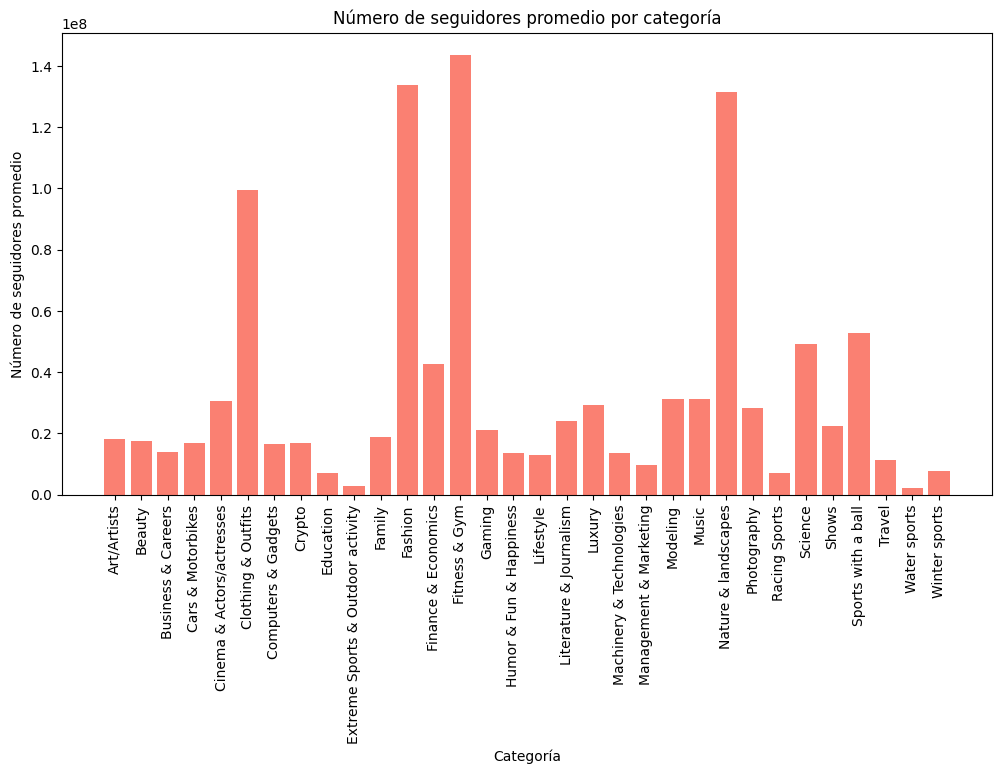

In [124]:
# Primero combinamos las columnas de categoría en una sola columna
#df_Insta['Category'] = df_Insta['Category1'].fillna('') + df_Insta['Category2'].fillna('')

# Agrupamos los datos por categoría y luego se obtiene el promedio de suscriptores
seguidores_por_categoria = df_Insta.groupby('Category')['Subscribers o Followers'].mean()

plt.figure(figsize=(12, 6))
plt.bar(seguidores_por_categoria.index, seguidores_por_categoria.values, color='salmon')
plt.xlabel('Categoría')
plt.ylabel('Número de seguidores promedio')
plt.title('Número de seguidores promedio por categoría')
plt.xticks(rotation=90)  
plt.show()

## Obtención de datos de TikTok

## Obtención de datos de Youtube

#### - Numero total de cuentas distintas

In [57]:
# Muestra las cuentas duplicadas
df_Youtube[df_Youtube.Username.duplicated(keep=False)]

,Name,Country,Month,Username,Subscribers,Views,Likes,Comments,Category1,Category2
3,MrBeast,United States,June,MrBeast6000,104100000,44800000,2200000,70900,Humor,Video games
12,Sony SAB,India,June,sabtv,71700000,61700,924,18,Animation,Movies
21,Movieclips,United States,June,movieclips,57800000,18800,181,11,Animation,Movies
33,YRF,India,June,yrf,48200000,67200,3400,19,Movies,Music & Dance
36,JuegaGerman,Mexico,June,JuegaGerman,46400000,1700000,114400,3900,Animation,Movies
...,...,...,...,...,...,...,...,...,...,...
4022,Patty Mayo,United States,December,Patty Mayo,10100000,159000,8000,450,Movies,Humor
4024,NASA,United States,December,NASAtelevision,10100000,92000,3700,0,News & Politics,Science & Technology
4029,QPark,United States,December,joycetanner,9900000,0,0,0,Music & Dance,Humor
4030,Talent Recap,United States,December,Talent Recap,9900000,76600,944,74,Music & Dance,Movies


In [58]:
# Número de cuentas distintas
df_Youtube.Username.nunique()

321

#### - Promedio de seguidores, views, likes, comments de cada cuenta

In [59]:
# Transformación de los datos a números
df_Youtube['Subscribers'] = df_Youtube['Subscribers'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Views'] = df_Youtube['Views'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Likes'] = df_Youtube['Likes'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9', "N/A'": '0'}, regex=True).map(pd.eval).astype(int)
df_Youtube['Comments'] = df_Youtube['Comments'].replace({'K': '*1e3', 'M': '*1e6', 'G':'*1e9', "N/A'": '0'}, regex=True).map(pd.eval).astype(int)

In [60]:
df_Youtube

,Name,Country,Month,Username,Subscribers,Views,Likes,Comments,Category1,Category2
3,MrBeast,United States,June,MrBeast6000,104100000,44800000,2200000,70900,Humor,Video games
12,Sony SAB,India,June,sabtv,71700000,61700,924,18,Animation,Movies
21,Movieclips,United States,June,movieclips,57800000,18800,181,11,Animation,Movies
27,EminemMusic,United States,June,EminemMusic,53300000,1600000,90600,5300,Animation,Movies
33,YRF,India,June,yrf,48200000,67200,3400,19,Movies,Music & Dance
...,...,...,...,...,...,...,...,...,...,...
4054,JoshDub,United States,December,JoshDub,9500000,713600,35400,1200,Animation,Humor
4055,Haschak Sisters,United States,December,jhaschak,9400000,2300000,14800,655,Music & Dance,Humor
4056,Joey Graceffa,United States,December,JoeyGraceffa,9400000,311100,23800,1500,Animals & Pets,Humor
4062,Thơ Nguyễn,United States,December,Thơ Nguyễn,9300000,185500,2400,106,Music & Dance,Animation


In [78]:
# Calculamos el promedio de seguidores, views, likes, comments  de cada cuenta
mean_subscribers = df_Youtube['Subscribers'].mean()
mean_views = df_Youtube['Views'].mean()
mean_comments = df_Youtube['Comments'].mean()
mean_likes = df_Youtube['Likes'].mean()

columnas = ['Subscribers','Views','Comments', 'Likes']
Promedios = df_Youtube.groupby(['Username', 'Month'])[columnas].mean()
Promedios.head(10)

Subscribers      Views  Comments    Likes
Username            Month                                               
#Refúgio Mental     June        12800000.0   341700.0      89.0   9800.0
                    November    12800000.0   142100.0      52.0   4900.0
                    September   12800000.0   142100.0      52.0   4900.0
0214mex             December    10300000.0  1300000.0    1400.0  30900.0
                    June        10400000.0  1700000.0    1800.0  43800.0
                    November    10400000.0   592200.0    1100.0  18500.0
                    September   10400000.0   592200.0    1100.0  18500.0
5-Minute Crafts DIY June        20900000.0    18300.0       9.0    303.0
                    November    20900000.0    11100.0       7.0    240.0
                    September   20900000.0    11100.0       7.0    240.0

#### - Métricas de Valor de cada cuenta

In [62]:
metricaYT = []
for c in range(len(Promedios)):
    # Promedio views/Promedio Followers
    metricaYT.append(Promedios['Views']/Promedios['Subscribers'])
    # Promedio likes/Promedio Followers
    metricaYT.append(Promedios['Likes']/Promedios['Subscribers'])
    # Promedio comments/Promedio Followers
    metricaYT.append(Promedios['Comments']/Promedios['Subscribers'])
    
print(metricaYT[0])
print(metricaYT[1])
print(metricaYT[2])

Username           Month    
#Refúgio Mental    June         0.026695
                   November     0.011102
                   September    0.011102
0214mex            December     0.126214
                   June         0.163462
                                  ...   
✿ Kids Diana Show  December     0.118012
설기양SULGI           December     0.083939
                   June         0.091010
                   November     0.048459
                   September    0.061946
Length: 855, dtype: float64
Username           Month    
#Refúgio Mental    June         0.000766
                   November     0.000383
                   September    0.000383
0214mex            December     0.003000
                   June         0.004212
                                  ...   
✿ Kids Diana Show  December     0.000423
설기양SULGI           December     0.002235
                   June         0.002114
                   November     0.001321
                   September    0.001207
Length: 855,

#### - Histograma con el número de cuentas que inician por cada letra del alfabeto y por símbolos

In [63]:
# Primero buscaremos el patron que tenga que inice con las letras del alfabeto 

patron_Alfabeto = r'^[a-zA-Z]'

Alfabeto = []
S_Alfabeto = []

for username in df_Youtube['Username']:
    if re.search(patron_Alfabeto, username):
        Alfabeto.append(username)
    else:
        S_Alfabeto.append(username)

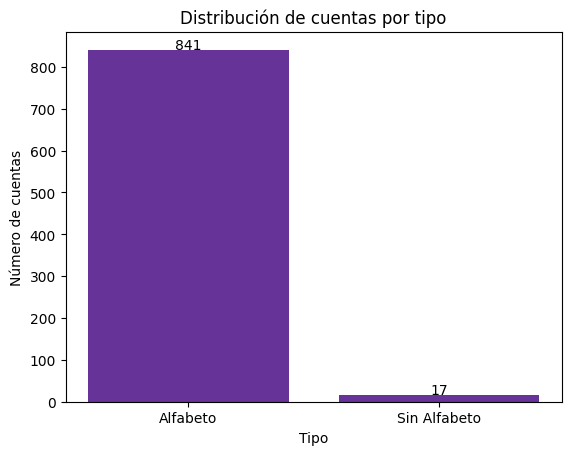

In [64]:
countA = len(Alfabeto)
countSA = len(S_Alfabeto)

etiquetas = ['Alfabeto', 'Sin Alfabeto']

# Crear los valores para el histograma
vals = [countA, countSA]

# En esta parte se crea el histograma
plt.bar(etiquetas, vals, color='rebeccapurple')
plt.xlabel('Tipo')
plt.ylabel('Número de cuentas')
plt.title('Distribución de cuentas por tipo')

# Mostramos el número exacto de cuentas en el histograma
for i, count in enumerate(vals):
    plt.text(i, count + 1, str(count), ha='center')

plt.show()


#### - ¿Cuantas cuentas de YouTube tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?
Las iniciales de mi equipo son L, E y M (Luis, Esmeralda y Mónica)

In [79]:
# Obtenemos las cuentas que inicien por E, e, M, m
# Patrón que contenga las iniciales de los integrantes del equipo 
patron = r'[lem]'
iniciales = re.compile(patron, re.IGNORECASE)
# Filtrar los registros que contengan las letras en las columnas 'Username' o 'Name'
cuentasYT = df_Youtube[(df_Youtube['Username'].str.contains(iniciales, na=False)) | (df_Youtube['Name'].str.contains(iniciales, na=False))]
# Obtener la cantidad de registros que cumplen la condición
cuentasYT.shape[0]

740

Por lo tanto, son 740 cuentas que tienen como inicial L,l,E,e,M,m en username o name.

#### - Métrica que identifique las 10 cuentas más importantes de YouTube
Se tomaron en cuenta la cantidad de subscriptores y la cantidad de comentarios, ya que al tener muchos subscriptores es más probable que si en dado caso, anunciarán publicidad acerca de algún producto, llegaría a más personas pues no son personas que solo estén suscritas, si no que participan en el canal de Youtube, nos aseguramos de eso gracias a la obtención de comentarios.

In [69]:
# Obtenemos los registros de diciembre para la métrica y los ordenamos ascentemente para obtener las cuentas
# más importantes, al menos por la métrica planteada que fue el conteo de subscribers y engagement.
cuentasImportYT = df_Youtube[df_Youtube['Month'] == 'December'].sort_values(by='Subscribers', ascending=False)
cuentasImportYTFinal = cuentasImportYT[cuentasImportYT['Month'] == 'December'].sort_values(by='Comments', ascending=False)
# Obtenemos el top 10 de cuentas con mayor número de seguidores en diciembre, se eligió filtrar por diciembre
# ya que es el mes de cierre y los usuarios que hayan tenido más subscriptores se consideran los más importantes
# para Instagram
top10 = cuentasImportYTFinal.head(10)
# Se muestra el username y cuantos subscribers tiene esa cuenta.
print(top10[['Username', 'Subscribers', 'Comments']])

            Username  Subscribers  Comments
3786     MrBeast6000     97300000    161600
3443   Harsh Beniwal     14700000     91000
3239        Bizarrap     14300000     68800
3628       Bad Bunny     41000000     54800
3650   MissaSinfonia     15500000     34500
3719              A4     40300000     29700
3612         AboFlah     25500000     25700
3810  MrBeast Gaming     27600000     19500
3779         Sidemen     15200000     18600
4017     Ben Azelart     10300000     17100


#### - Cree una serie con todas los países existentes en todos los archivos de YouTube

In [73]:
# Obtener los países únicos (todos)
TodosPaises= [] 
TodosPaises = (df_Youtube['Country'].unique()).tolist()
TodosPaises

['United States',
 'India',
 'Mexico',
 'Brazil',
 'Russia',
 'Spain',
 'Indonesia',
 'Colombia',
 'Iraq',
 'United Kingdom',
 'Argentina',
 'Thailand',
 'Philippines',
 'France',
 'Pakistan',
 'Saudi Arabia',
 'Japan',
 'Peru',
 'Turkey',
 '-']

#### - Histograma del número de seguidores promedio por país.

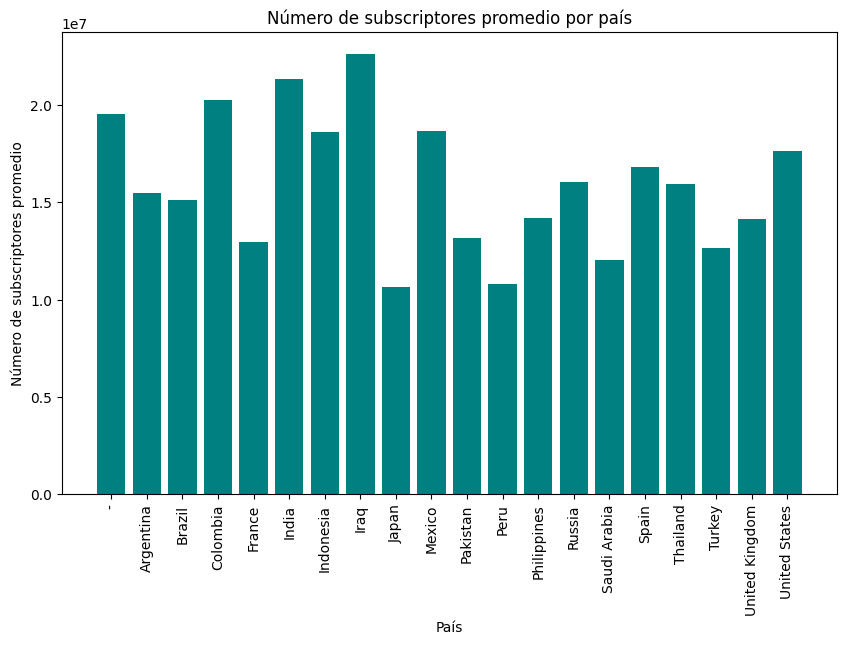

In [77]:
# Obtener los países únicos
paises = df_Youtube['Country'].unique()

# Calcular el número de seguidores promedio por país
promedio_seguidores = df_Youtube.groupby('Country')['Subscribers'].mean()

plt.figure(figsize=(10, 6))
plt.bar(promedio_seguidores.index, promedio_seguidores.values, color='teal')
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Número de subscriptores promedio')
plt.title('Número de subscriptores promedio por país')
plt.show()

#### - Cree una serie con todas las categorías existentes en todos los archivos de YouTube

In [70]:
# Obtener las categorías únicas (todas)
df_Youtube['Category'] = df_Youtube['Category1'].combine_first(df_Youtube['Category2'])
TodasCat = (df_Youtube['Category'].unique()).tolist()
TodasCat

['Humor',
 'Animation',
 'Movies',
 'Video games',
 'DIY & Life Hacks',
 'Health & Self Help',
 'Fashion',
 'Toys',
 'Beauty',
 'News & Politics',
 'Food & Drinks',
 'Autos & Vehicles',
 'Design/art',
 'Science & Technology',
 'Music & Dance',
 'Fitness',
 'ASMR',
 'Education',
 'Sports',
 'Animals & Pets']

#### - Histograma el número de seguidores por categoría

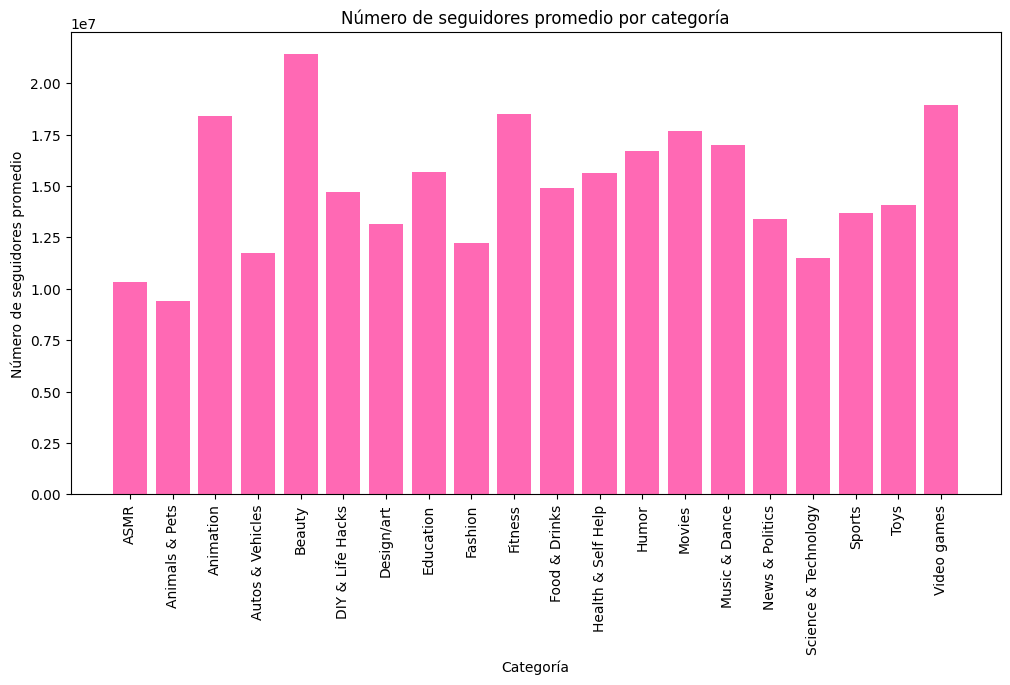

In [76]:
# Primero combinamos las columnas de categoría en una sola columna
# Agrupamos los datos por categoría y luego se obtiene el promedio de suscriptores
seguidores_por_categoria = df_Youtube.groupby('Category')['Subscribers'].mean()
plt.figure(figsize=(12, 6))
plt.bar(seguidores_por_categoria.index, seguidores_por_categoria.values, color='hotpink')
plt.xlabel('Categoría')
plt.ylabel('Número de seguidores promedio')
plt.title('Número de seguidores promedio por categoría')
plt.xticks(rotation=90)  
plt.show()

## ¿Cuales son las 5 cuentas mas importantes de las 3 redes sociales?